팀원 명단:
이연우	학과: 자유전공학부    학번: 2021-11577
이강혁	학과: 자유전공학부    학번: 2021-13290
양태현	학과: 자유전공학부    학번: 2021-14284
김지윤  학과: 자유전공학부    학번: 2021-17138

주제: 옛날 우리 부모님들이 자주 들으셨던 서태지와 아이들 노래와 김광석 노래를 들어보면 현재 한국 가요와 매우 다르다는 것을 알 수 있다. 하지만 현재가요와 과거의 가요의 가사는 어떠한 차이가 있을까? 그 중 언어적인 관점에서 그 차이를 알아보는 조사를 진행한다.

추가 Note:
각 년도의 제일 인기 있었던 100개곡을 분석하기 때문에 총 600개의 가사 링크에서 Unique Word를 분석함. 그러기 때문에 Web Crawling부분 lyricdet부분에 상당한 시간이 걸림. 팀원 컴퓨터로 진행했을때는 13분44초가 걸리고 코드에 에러가 아닌 많은수의 음악을 분석하느라 발생하는 현상임.

#1. Import Packages

In [ ]:
!apt-get update
!apt-get install python-numpy libicu-dev
!pip install polyglot
!pip install PyICU
!pip install pycld2

from bs4 import BeautifulSoup
from urllib.request import urlopen
from collections import Counter
from polyglot.detect import Detector
import matplotlib.pyplot as plt
import numpy as np

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/grap

#2.Entire Code

name: Korean      code: ko       confidence:  99.0 read bytes:  3652
name: English     code: en       confidence:   0.0 read bytes:  1241
name: Xhosa       code: xh       confidence:   0.0 read bytes:   585
['Korean', '99.0', 'English', '0.0', 'Xhosa', '0.0', '1995']
name: Korean      code: ko       confidence:  95.0 read bytes:  3647
name: English     code: en       confidence:   4.0 read bytes:  1260
name: un          code: un       confidence:   0.0 read bytes:     0
['Korean', '95.0', 'English', '4.0', 'un', '0.0', '2000']
name: Korean      code: ko       confidence:  94.0 read bytes:  3637
name: English     code: en       confidence:   5.0 read bytes:  1218
name: Scots       code: sco      confidence:   0.0 read bytes:  1511
['Korean', '94.0', 'English', '5.0', 'Scots', '0.0', '2005']
name: Korean      code: ko       confidence:  88.0 read bytes:  3609
name: English     code: en       confidence:   9.0 read bytes:  1240
name: Scots       code: sco      confidence:   0.0 read bytes

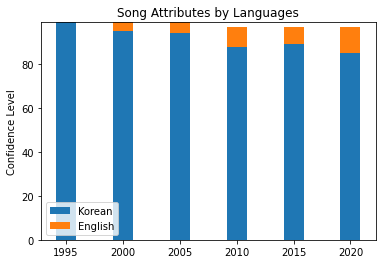

In [ ]:
def lyricfinder(link): #벅스음원 사이트의 "  "년 베스트 가요 콜렉션 링크를 사용하여 포함되어 있는 인기 100노래의 가사 링크를 Obtain하는 function

    url = urlopen(link)
    lyriclinks=[]     #empty array instatiation



    encoding=url.info().get_content_charset(failobj="utf-8")     #setup for webcrawling
    text=url.read().decode(encoding)
    soup= BeautifulSoup(text,'html.parser')

    for link in soup.find_all('a','trackInfo')    :#inspect 부분에서 link placeholder 가 있는 곳을 타겟
      lyriclinks.append(link.get('href'))

    return lyriclinks     #link를 함수의 output으로 array로 만듬
  
def confidenceparser(string):  #name: Korean      code: ko       confidence:  85.0 read bytes:  3608 이런 형식으로 나오는 polyglot detector function에서 confidence 숫자를 때내기위한 function
  left,right=string.split("confidence: ")     #split을 이용하여 left and right string을 partition
  left2,right2=right.split("read")
  return left2.strip()

def languageparser(string): #위에 나오는 형식의 Languagename을 때내기 위한 function
  left,right=string.split("name: ") #위에 logic과 동일
  left2,right2=right.split("   code")
  return left2.strip()


def lyricdet(songs,year):           #가사링크를 lyriclinks array를 활용하여 가사분석을 실행하는 함수
  unique = []                       #가사word의 Unique 한 언어를 카운팅하기 때문에 Unique Instatiation
  total=[]                          #각 노래의 Unique한 word를 나중에 총 합할 array
  i=0
  while i<len(songs):               #<100과 동일
  
    url = urlopen(songs[i])

    encoding=url.info().get_content_charset(failobj="utf-8")    #Setup
    text=url.read().decode(encoding)
    soup= BeautifulSoup(text,'html.parser')

    lyrics=soup.find_all('div','lyricsContainer')             #가사가 있는 web element를 타겟
    lyrics=soup.find_all('xmp')
    lyrics=str(lyrics)
    lyrics = lyrics.replace("[<xmp>", "")                     #불필요한 추가적인 web element 제거
    lyrics = lyrics.replace("</xmp>]", "")
    lyrics = lyrics.lower()                                   #영어단어를 위한 lowercase
    words = lyrics.split()                                    #각 단어를 spacebar로 분석하기 위한 split
    i=i+1

    for word in words:                                        #모든 단어를 Unique라는 array에 넣어서 비교분석, unique array에 동일한 단어가 있으면 append할 필요 없음 주로 the, a,과, 나 를, 이런 반복적인 언어를 지우기 위한 process
      if word not in unique:
          unique.append(word)

    total=total+unique                                        #unique한 단어를 최종 total array에 dump
    unique=[]                                                 #unique체커를 매 노래마다 새로 확인해야하기때문에 다시 array를 비움

  data=[]
  string=' '.join([str(item) for item in total])              #total이란 array를 한 string으로 넣기 위한 라인
  for language in Detector(string).languages:                 #polyglot이란 package를 활용하여 total에있는 String의 언어를 분석 KR몇 프로 EN 몇 프로 
    print(str(language))                 
    data.append(languageparser(str(language)))                #name: Korean      code: ko       confidence:  85.0 read bytes:  3608 처럼 나오는 데이터를 parser function을 활용해 data라는 array에 append
    data.append(confidenceparser(str(language)))              #confidence data %를 append
  
  data.append(year)                                           #마지막에 이 데이터가 무슨 year에 correlates하는지 알려주기 위해 추가
  print(data)                                                  #Raw Data 출력
  return data

def graph(data1,data2,data3,data4,data5,data6):               #가지고온 data를 그래프로 만드는 function

  alldata=[data1,data2,data3,data4,data5,data6]               #데이터를 2d matrix로 변형하여 쉽게 조작
  a=0
  years=[]                                                    #그래프에 표기하기위한 x axis data
  language1values=[]                                          #그래프에 y axis를 합한 데이터를 제작하기 위한 2data instatiation
  language2values=[]
  while a<6:                                                  #["Korean",'65','english','35','year'] 이런 식으로 되있는 데이터를 그래프로 사용할 array로 만들 process
    years.append(alldata[a][6])
    language1values.append(float(alldata[a][1]))
    language2values.append(float(alldata[a][3]))
    a=a+1

  width = 0.35                                                #graph의 width 설정

  fig, ax = plt.subplots()                                    

  ax.bar(years, language1values, width, label=data1[0])       #graph data를 설정하고 legend를 data1[0]=Korean으로 설정
  ax.bar(years, language2values, width, bottom=language1values,label=data1[2]) #graph data를 설정하고 legend를 data1[2]=English으로 설정 Bottom을 language1value로 추가하여 korean+english데이터를 활용

  ax.set_ylabel('Confidence Level')                           #Graph labeling
  ax.set_title('Song Attributes by Languages')
  ax.legend()

  plt.show()



#def over main code
lyrics1995= lyricfinder("https://music.bugs.co.kr/musicpd/albumview/6794?wl_ref=list_mab_03")           #Find all the song's lyric page from a top album of 1995
lyrics2000=lyricfinder("https://music.bugs.co.kr/musicpd/albumview/6720")                               #Find all the song's lyric page from a top album of 2000
lyrics2005=lyricfinder("https://music.bugs.co.kr/musicpd/albumview/6715")                                #Find all the song's lyric page from a top album of 2005
lyrics2010=lyricfinder("https://music.bugs.co.kr/musicpd/albumview/36722")                              #Find all the song's lyric page from a top album of 2010 etc..
lyrics2015=lyricfinder("https://music.bugs.co.kr/musicpd/albumview/15389")
lyrics2020=lyricfinder("https://music.bugs.co.kr/musicpd/albumview/43963")


yr95=lyricdet(lyrics1995,"1995")                                                                #찾은 링크를 활용해서 가사 분석을 실행함
yr00=lyricdet(lyrics2000,"2000")
yr05=lyricdet(lyrics2005,"2005")
yr10=lyricdet(lyrics2010,"2010")
yr15=lyricdet(lyrics2015,"2015")
yr20=lyricdet(lyrics2020,"2020")

graph(yr95,yr00,yr05,yr10,yr15,yr20)                                                          #가사 분석으로 만든 Dataarray를 활용한 Graph만들기

#3. lyricfinder 함수: 
lyrics2000=lyricfinder("https://music.bugs.co.kr/musicpd/albumview/6720")   로 100개 인기 노래의 벅스 앨범을 활용해 모든 노래의 가사 페이지를 수집

In [ ]:
def lyricfinder(link): #벅스음원 사이트의 "  "년 베스트 가요 콜렉션 링크를 사용하여 포함되어 있는 인기 100노래의 가사 링크를 Obtain하는 function

    url = urlopen(link)
    lyriclinks=[]     #empty array instatiation



    encoding=url.info().get_content_charset(failobj="utf-8")     #setup for webcrawling
    text=url.read().decode(encoding)
    soup= BeautifulSoup(text,'html.parser')

    for link in soup.find_all('a','trackInfo')    :#a class의 trackInfo를 가진 'id' inspect 부분에서 link placeholder 가 있는 곳을 타겟
      lyriclinks.append(link.get('href'))

    return lyriclinks     #link를 함수의 output으로 array로 만듬

    

#4. lyricdet함수+ technical functions:

가사링크를 array로 받은후 그 array의 모든 가사를 string으로 seperate하고 Unique(array)한 String으로 분류. 그 후 각 노래의 unique한 string을 total(array)에다가 추가한 후 array를 다시 하나의 string으로 conversion. Polyglot의 detector 활용한 언어 분석으로 total(String)을 인풋, 그러면 각 언어의 confidence level이 나오는데 나온 string을 우리가 사용할 수 있는 데이터로 parser function이 data(array)에 만듬

In [ ]:
def confidenceparser(string):  #name: Korean      code: ko       confidence:  85.0 read bytes:  3608 이런 형식으로 나오는 polyglot detector function에서 confidence 숫자를 때내기위한 function
  left,right=string.split("confidence: ")     #split을 이용하여 left and right string을 partition
  left2,right2=right.split("read")
  return left2.strip()

def languageparser(string): #위에 나오는 형식의 Languagename을 때내기 위한 function
  left,right=string.split("name: ") #위에 logic과 동일
  left2,right2=right.split("   code")
  return left2.strip()


def lyricdet(songs,year):           #가사링크를 lyriclinks array를 활용하여 가사분석을 실행하는 함수
  unique = []                       #가사word의 Unique 한 언어를 카운팅하기 때문에 Unique Instatiation
  total=[]                          #각 노래의 Unique한 word를 나중에 총 합할 array
  i=0
  while i<len(songs):               #<100과 동일
  
    url = urlopen(songs[i])

    encoding=url.info().get_content_charset(failobj="utf-8")    #Setup
    text=url.read().decode(encoding)
    soup= BeautifulSoup(text,'html.parser')

    lyrics=soup.find_all('div','lyricsContainer')             #가사가 있는 web element를 타겟
    lyrics=soup.find_all('xmp')
    lyrics=str(lyrics)
    lyrics = lyrics.replace("[<xmp>", "")                     #불필요한 추가적인 web element 제거
    lyrics = lyrics.replace("</xmp>]", "")
    lyrics = lyrics.lower()                                   #영어단어를 위한 lowercase
    words = lyrics.split()                                    #각 단어를 spacebar로 분석하기 위한 split
    i=i+1

    for word in words:                                        #모든 단어를 Unique라는 array에 넣어서 비교분석, unique array에 동일한 단어가 있으면 append할 필요 없음 주로 the, a,과, 나 를, 이런 반복적인 언어를 지우기 위한 process
      if word not in unique:
          unique.append(word)

    total=total+unique                                        #unique한 단어를 최종 total array에 dump
    unique=[]                                                 #unique체커를 매 노래마다 새로 확인해야하기때문에 다시 array를 비움

  data=[]
  string=' '.join([str(item) for item in total])              #total이란 array를 한 string으로 넣기 위한 라인
  for language in Detector(string).languages:                 #polyglot이란 package를 활용하여 total에있는 String의 언어를 분석 KR몇 프로 EN 몇 프로 
    data.append(languageparser(str(language)))                #name: Korean      code: ko       confidence:  85.0 read bytes:  3608 처럼 나오는 데이터를 parser function을 활용해 data라는 array에 append
    data.append(confidenceparser(str(language)))              #confidence data %를 append
  
  data.append(year)                                           #마지막에 이 데이터가 무슨 year에 correlates하는지 알려주기 위해 추가

  return data

#5. data정리+Graph 함수:

Data로 나온 array를 그래프화 할 수 있게 다시 배열하고 Stacked bargraph를 matlab plot을 활용해서 생성.


In [ ]:

def graph(data1,data2,data3,data4,data5,data6):               #가지고온 data를 그래프로 만드는 function

  alldata=[data1,data2,data3,data4,data5,data6]               #데이터를 2d matrix로 변형하여 쉽게 조작
  a=0
  years=[]                                                    #그래프에 표기하기위한 x axis data
  language1values=[]                                          #그래프에 y axis를 합한 데이터를 제작하기 위한 2data instatiation
  language2values=[]
  while a<6:                                                  #["Korean",'65','english','35','year'] 이런 식으로 되있는 데이터를 그래프로 사용할 array로 만들 process
    years.append(alldata[a][6])
    language1values.append(float(alldata[a][1]))
    language2values.append(float(alldata[a][3]))
    a=a+1

  width = 0.35                                                #graph의 width 설정

  fig, ax = plt.subplots()                                    

  ax.bar(years, language1values, width, label=data1[0])       #graph data를 설정하고 legend를 data1[0]=Korean으로 설정
  ax.bar(years, language2values, width, bottom=language1values,label=data1[2]) #graph data를 설정하고 legend를 data1[2]=English으로 설정 Bottom을 language1value로 추가하여 korean+english데이터를 활용

  ax.set_ylabel('Confidence Level')                           #Graph labeling
  ax.set_title('Song Attributes by Languages')
  ax.legend()

  plt.show()

#6. Function을 Define한 후 Main에 사용되는 나머지 code들 

In [ ]:
lyrics1995= lyricfinder("https://music.bugs.co.kr/musicpd/albumview/6794?wl_ref=list_mab_03")           #Find all the song's lyric page from a top album of 1995
lyrics2000=lyricfinder("https://music.bugs.co.kr/musicpd/albumview/6720")                               #Find all the song's lyric page from a top album of 2000
lyrics2005=lyricfinder("https://music.bugs.co.kr/musicpd/albumview/6715")                                #Find all the song's lyric page from a top album of 2005
lyrics2010=lyricfinder("https://music.bugs.co.kr/musicpd/albumview/36722")                              #Find all the song's lyric page from a top album of 2010 etc..
lyrics2015=lyricfinder("https://music.bugs.co.kr/musicpd/albumview/15389")
lyrics2020=lyricfinder("https://music.bugs.co.kr/musicpd/albumview/43963")


yr95=lyricdet(lyrics1995,"1995")                                                                #찾은 링크를 활용해서 가사 분석을 실행함
yr00=lyricdet(lyrics2000,"2000")
yr05=lyricdet(lyrics2005,"2005")
yr10=lyricdet(lyrics2010,"2010")
yr15=lyricdet(lyrics2015,"2015")
yr20=lyricdet(lyrics2020,"2020")

graph(yr95,yr00,yr05,yr10,yr15,yr20)                                            #yr95-20(array)를 활용한 그래프 만들기

['https://music.bugs.co.kr/track/31904571?wl_ref=list_tr_08_mab', 'https://music.bugs.co.kr/track/31999479?wl_ref=list_tr_08_mab', 'https://music.bugs.co.kr/track/31806631?wl_ref=list_tr_08_mab', 'https://music.bugs.co.kr/track/31867170?wl_ref=list_tr_08_mab', 'https://music.bugs.co.kr/track/31793255?wl_ref=list_tr_08_mab', 'https://music.bugs.co.kr/track/31769281?wl_ref=list_tr_08_mab', 'https://music.bugs.co.kr/track/68635585?wl_ref=list_tr_08_mab', 'https://music.bugs.co.kr/track/68635584?wl_ref=list_tr_08_mab', 'https://music.bugs.co.kr/track/31954275?wl_ref=list_tr_08_mab', 'https://music.bugs.co.kr/track/31820337?wl_ref=list_tr_08_mab', 'https://music.bugs.co.kr/track/31780300?wl_ref=list_tr_08_mab', 'https://music.bugs.co.kr/track/31861854?wl_ref=list_tr_08_mab', 'https://music.bugs.co.kr/track/31833551?wl_ref=list_tr_08_mab', 'https://music.bugs.co.kr/track/31955568?wl_ref=list_tr_08_mab', 'https://music.bugs.co.kr/track/31708907?wl_ref=list_tr_08_mab', 'https://music.bugs.co.k